# Evaluating Logistic Regression Models - Lab

## Introduction

In regression, you are predicting values so it makes sense to discuss error as a distance of how far off our estimates were. When classifying a binary variable, however, a model is either correct or incorrect. As a result, we tend to quantify this in terms of how many false positives versus false negatives we come across. In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this review lab, we'll review precision, recall, accuracy, and F1-score in order to evaluate our logistic regression models.


## Objectives
You will be able to:  
- Understand and assess precision, recall, and accuracy of classifiers
- Evaluate classification models using various metrics

## Terminology Review  

Let's take a moment and review some classification evaluation metrics:  


$Precision = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}$    
  

$Recall = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}$  
  
$Accuracy = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}}$

$\text{F1-Score} = 2\ \frac{Precision\ x\ Recall}{Precision + Recall}$


At times, it may be superior to tune a classification algorithm to optimize against precision or recall rather than overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is preferable to optimize for recall, the number of cancer positive cases, than it is to optimize precision, the percentage of our predicted cancer-risk patients who are indeed positive.

## 1. Split the data into train and test sets

In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
#Your code here
from sklearn.model_selection import train_test_split

X = df[df.columns[:-1]]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## 2. Create a standard logistic regression model

In [3]:
#Your code here
from sklearn.linear_model import LogisticRegression

In [4]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, 
                            solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## 3. Write a function to calculate the precision

In [5]:
def precision(y_hat, y):
    #Your code here
    y_yhat = list(zip(y, y_hat))
    tp = sum([1 for i in y_yhat if i[0]==1 and i[1]==1])
    fp = sum([1 for i in y_yhat if i[0]==0 and i[1]==1])
    return tp/(tp+fp)

## 4. Write a function to calculate the recall

In [6]:
def recall(y_hat, y):
    #Your code here
    y_yhat = list(zip(y, y_hat))
    tp = sum([1 for i in y_yhat if i[0]==1 and i[1]==1])
    fn = sum([1 for i in y_yhat if i[0]==1 and i[1]==0])
    return tp / (tp+fn)

## 5. Write a function to calculate the accuracy

In [7]:
def accuracy(y_hat, y):
    #Your code here
    y_yhat = list(zip(y, y_hat))
    tp = sum([1 for i in y_yhat if i[0]==1 and i[1]==1])
    tn = sum([1 for i in y_yhat if i[0]==0 and i[1]==0])
    return (tp+tn)/len(y_hat)

## 6. Write a function to calculate the F1-score

In [8]:
def f1_score(y_hat,y):
    #Your code here
    precision_sc = precision(y_hat, y)
    recall_sc = recall(y_hat, y)
    return 2 *(precision_sc * recall_sc)/(precision_sc + recall_sc)

## 7. Calculate the precision, recall, accuracy, and F1-score of your classifier.

Do this for both the train and the test set

In [9]:
#Your code here
print('Train Precision: ', precision(logreg.predict(X_train), y_train))
print('Train Recall: ', recall(logreg.predict(X_train), y_train))
print('Train Accuracy: ', accuracy(logreg.predict(X_train), y_train))
print('Train F1-Score: ', f1_score(logreg.predict(X_train), y_train))
print('\n')
print('Test Precision: ', precision(logreg.predict(X_test), y_test))
print('Test Recall: ', recall(logreg.predict(X_test), y_test))
print('Test Accuracy: ', accuracy(logreg.predict(X_test), y_test))
print('Test F1-Score: ', f1_score(logreg.predict(X_test), y_test))

Train Precision:  0.8396946564885496
Train Recall:  0.9016393442622951
Train Accuracy:  0.8546255506607929
Train F1-Score:  0.8695652173913043


Test Precision:  0.8125
Test Recall:  0.9069767441860465
Test Accuracy:  0.8289473684210527
Test F1-Score:  0.8571428571428572


Great Job! Now it's time to check your work with sklearn. 

## 8. Calculating Metrics with sklearn

Each of the metrics we calculated above is also available inside the `sklearn.metrics` module.  

In the cell below, import the following functions:

* `precision_score`
* `recall_score`
* `accuracy_score`
* `f1_score`

Compare the results of your performance metrics functions with the sklearn functions above. Calculate these values for both your train and test set.

In [10]:
#Your code here
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Train Precision: ', precision_score(logreg.predict(X_train), y_train))
print('Train Recall: ', recall_score(logreg.predict(X_train), y_train))
print('Train Accuracy: ', accuracy_score(logreg.predict(X_train), y_train))
print('Train F1-Score: ', f1_score(logreg.predict(X_train), y_train))
print('\n')
print('Test Precision: ', precision_score(logreg.predict(X_test), y_test))
print('Test Recall: ', recall_score(logreg.predict(X_test), y_test))
print('Test Accuracy: ', accuracy_score(logreg.predict(X_test), y_test))
print('Test F1-Score: ', f1_score(logreg.predict(X_test), y_test))


Train Precision:  0.9016393442622951
Train Recall:  0.8396946564885496
Train Accuracy:  0.8546255506607929
Train F1-Score:  0.8695652173913043


Test Precision:  0.9069767441860465
Test Recall:  0.8125
Test Accuracy:  0.8289473684210527
Test F1-Score:  0.8571428571428572


## 9. Comparing Precision, Recall, Accuracy, and F1-Score of Test vs Train Sets


Calculate and then plot the precision, recall, accuracy, and F1-score for the test and train splits using different training set sizes. What do you notice?

In [11]:
import  matplotlib.pyplot  as plt
%matplotlib inline

In [12]:
training_Precision = []
testing_Precision = []
training_Recall = []
testing_Recall = []
training_Accuracy = []
testing_Accuracy = []
training_f1 = []
testing_f1 = []

for i in range(10,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= i/100) #replace the "None" here
    logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train)

# Your code here
    training_Precision.append(precision_score(y_hat_train, y_train))
    testing_Precision.append(precision_score(y_hat_test, y_test))
    training_Recall.append(recall_score(y_hat_train, y_train))
    testing_Recall.append(recall_score(y_hat_test, y_test))
    training_Accuracy.append(accuracy_score(y_hat_train, y_train))
    testing_Accuracy.append(accuracy_score(y_hat_test, y_test))
    training_f1.append(f1_score(y_hat_train, y_train))
    testing_f1.append(f1_score(y_hat_test, y_test))

Create 4 scatter plots looking at the test and train precision in the first one, test and train recall in the second one, test and train accuracy in the third one, and test and train f1-score in the fourth one.

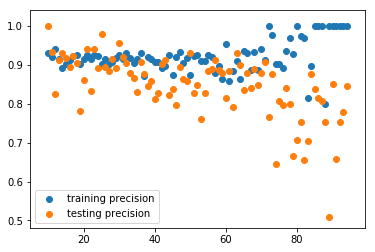

In [13]:
# code for test and train precision
plt.scatter(list(range(10,95)), training_Precision, label='training precision')
plt.scatter(list(range(10,95)), testing_Precision, label='testing precision')
plt.legend()

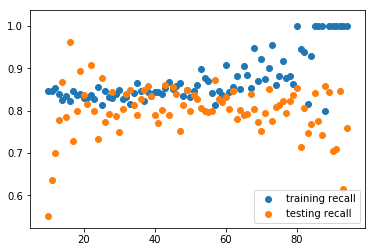

In [14]:
# code for test and train recall
plt.scatter(list(range(10,95)), training_Recall, label='training recall')
plt.scatter(list(range(10,95)), testing_Recall, label='testing recall')
plt.legend()

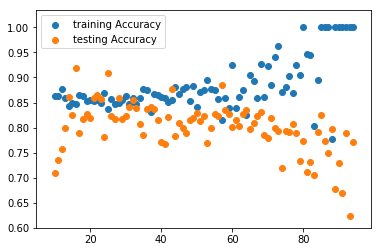

In [15]:
# code for test and train accuracy
plt.scatter(list(range(10,95)), training_Accuracy, label='training Accuracy')
plt.scatter(list(range(10,95)), testing_Accuracy, label='testing Accuracy')
plt.legend()

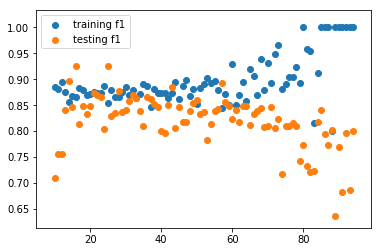

In [16]:
# code for test and train F1-score
plt.scatter(list(range(10,95)), training_f1, label='training f1')
plt.scatter(list(range(10,95)), testing_f1, label='testing f1')
plt.legend()

## Summary

Nice! In this lab, you gained some extra practice with evaluation metrics for classification algorithms. You also got some further python practice by manually coding these functions yourself, giving you a deeper understanding of how they work. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.